# K-Means Clustering Algorithms

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np

In [12]:
x, y = make_blobs(
    n_samples=1000,
    centers=3,
    n_features=2
)

In [13]:
x[:10]

array([[  1.22679678,  10.00169817],
       [ -0.68783841,   9.90795685],
       [  1.7943316 ,   9.08335788],
       [ -0.03193533,  10.67329117],
       [ -3.01984346,   0.737584  ],
       [  0.78695495,   9.79538119],
       [ -1.47168276,   7.75247534],
       [ -1.26055198,   8.49597882],
       [ -0.4824368 ,   9.15660972],
       [-10.04763146,   3.29046256]])

In [14]:
y[:20]

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 1, 0, 1, 1, 0, 2, 2, 0, 2, 0])

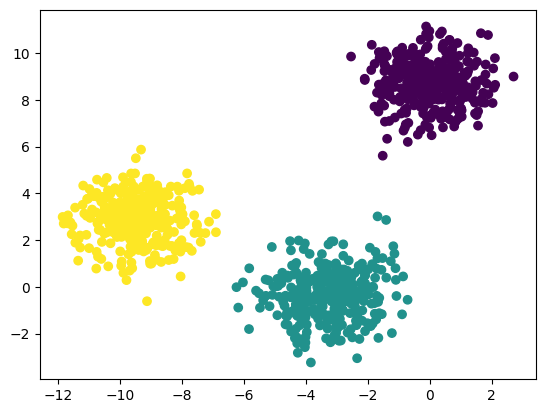

In [16]:
plt.scatter(x[:, 0], x[:, 1], c=y)

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.33, random_state=42
)

In [17]:
# standardization = feature scaling technique
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [19]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [20]:
from sklearn.cluster import KMeans

In [21]:
# elbow method to select k-value
wcss = []
for k in range(1, 11):
    kmeans_model = KMeans(n_clusters=k, init="k-means++")
    kmeans_model.fit(x_train_scaled)
    wcss.append(kmeans_model.inertia_)

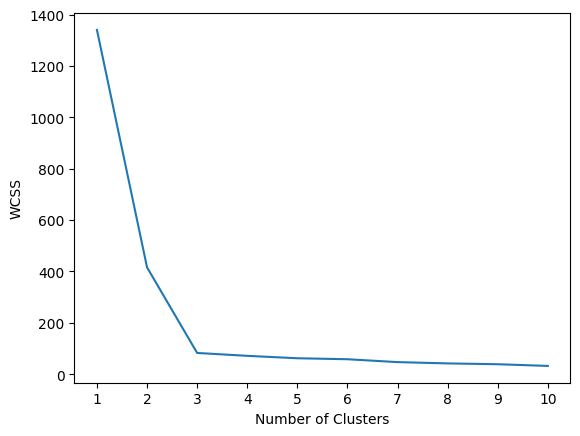

In [24]:
# plot the elbow curve
plt.plot(range(1, 11), wcss)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [25]:
# according the elbow method, n_clusters = 3
kmeans_model = KMeans(n_clusters=3, init="k-means++")

In [26]:
kmeans_model.fit_predict(x_train_scaled)

array([1, 1, 2, 0, 1, 1, 2, 0, 1, 1, 2, 0, 1, 1, 0, 2, 0, 1, 0, 2, 1, 2,
       0, 2, 0, 0, 1, 2, 1, 1, 1, 2, 1, 2, 2, 0, 2, 1, 0, 0, 1, 2, 2, 2,
       1, 1, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 1, 1, 1, 1, 2, 2, 0, 2, 0,
       2, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 2, 2, 2, 1, 0, 0, 2, 1, 1, 1,
       1, 0, 2, 0, 2, 1, 1, 2, 1, 0, 0, 1, 1, 2, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 2, 2, 2, 1, 2, 2, 1, 0, 1, 1, 2, 2, 2, 1, 0, 0, 2, 1, 0, 2,
       2, 2, 0, 1, 0, 0, 2, 2, 2, 0, 0, 0, 0, 1, 2, 1, 2, 0, 1, 2, 1, 2,
       1, 0, 0, 2, 2, 0, 1, 2, 0, 0, 2, 2, 1, 2, 1, 2, 0, 0, 0, 1, 0, 2,
       2, 0, 2, 1, 2, 1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 2,
       0, 1, 1, 2, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 2, 1, 2, 1, 2, 2, 0,
       0, 2, 0, 0, 2, 2, 2, 0, 2, 2, 1, 1, 0, 0, 0, 2, 1, 1, 2, 0, 2, 1,
       1, 0, 2, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 2, 1, 1, 1, 2, 0, 1, 1,
       2, 2, 2, 1, 2, 0, 1, 2, 2, 2, 1, 2, 2, 2, 1, 0, 1, 2, 1, 2, 0, 1,
       0, 2, 0, 0, 2, 2, 2, 1, 2, 0, 0, 1, 2, 0, 2,

In [27]:
y_pred = kmeans_model.predict(x_test_scaled)

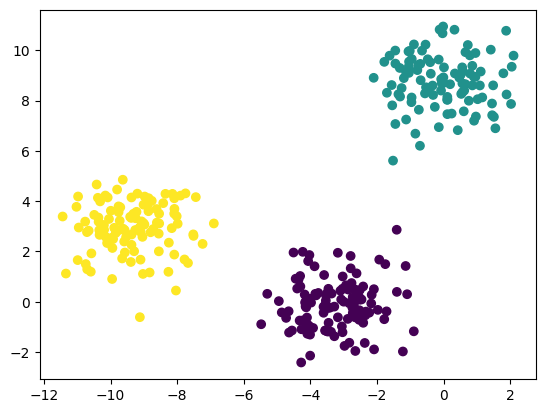

In [28]:
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_pred)

In [29]:
# validating the k-value
# knee-locator
from kneed import KneeLocator

In [30]:
kl = KneeLocator(range(1, 11), wcss, curve="convex", direction="decreasing")

In [31]:
kl.elbow

np.int64(3)

In [32]:
# silhoutee score
from sklearn.metrics import silhouette_score

In [34]:
silhouette_coef = []
for k in range(2, 11):
    kmeans_model = KMeans(n_clusters=k, init="k-means++")
    kmeans_model.fit(x_train_scaled)
    score = silhouette_score(x_train_scaled, kmeans_model.labels_)
    silhouette_coef.append(score)

In [35]:
silhouette_coef

[0.6636601623748983,
 0.7706280285019647,
 0.6196693685395074,
 0.5048491286991388,
 0.46261573262242883,
 0.3507665950070185,
 0.3590868805197637,
 0.337461950573371,
 0.3500305308360278]

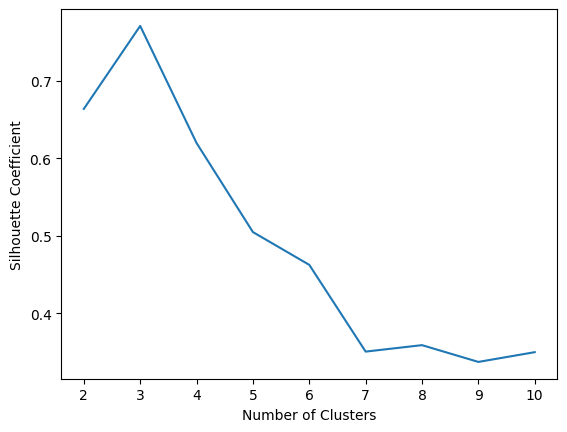

In [36]:
# plot the silhouette score
plt.plot(range(2, 11), silhouette_coef)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()